<a href="https://colab.research.google.com/github/swag64/steganography/blob/main/AI-Powered%20Secure%20Image%20Steganography%20Using%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python numpy tensorflow keras matplotlib


In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from google.colab import files
import os

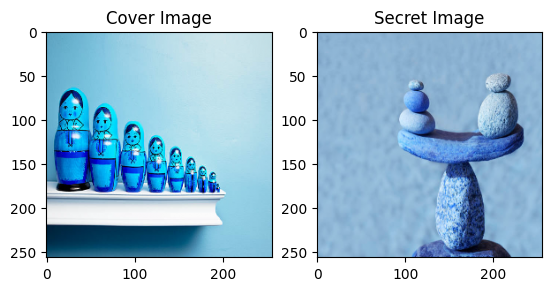

In [4]:
def load_and_preprocess(image_path, size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, size)
    img = img / 255.0  # Normalize
    return img

cover_image = load_and_preprocess("/cover.jpg")
secret_image = load_and_preprocess("/secret.jpg")

plt.subplot(1, 2, 1)
plt.imshow(cover_image)
plt.title("Cover Image")

plt.subplot(1, 2, 2)
plt.imshow(secret_image)
plt.title("Secret Image")
plt.show()


In [5]:
def build_steganography_model():
    input_layer = layers.Input(shape=(256, 256, 3))

    # Encoder: Extract features
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(input_layer)
    x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)

    # Decoder: Reconstruct hidden image
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    output_layer = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

    model = keras.Model(input_layer, output_layer)
    model.compile(optimizer="adam", loss="mse")

    return model

# Create the model
steg_model = build_steganography_model()
steg_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,171 (590.51 KB)

 Trainable params: 151,171 (590.51 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
X_train = np.expand_dims(cover_image, axis=0)
Y_train = np.expand_dims(secret_image, axis=0)

steg_model.fit(X_train, Y_train, epochs=100, batch_size=1)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0561
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0354
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0240
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0260
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0266
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0244
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0224
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0222
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0224
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0223
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0218
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0210
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0203
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0201
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0203
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


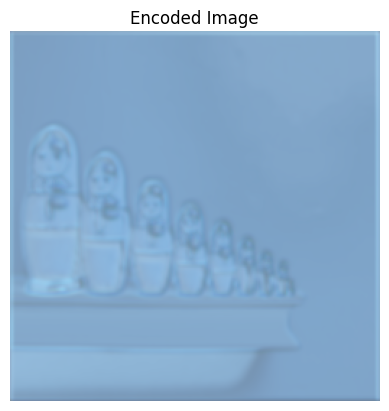

In [7]:
encoded_image = steg_model.predict(X_train)[0]

# Save and display the encoded image
cv2.imwrite("/content/encoded_image.jpg", (encoded_image * 255).astype(np.uint8))
plt.imshow(encoded_image)
plt.title("Encoded Image")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


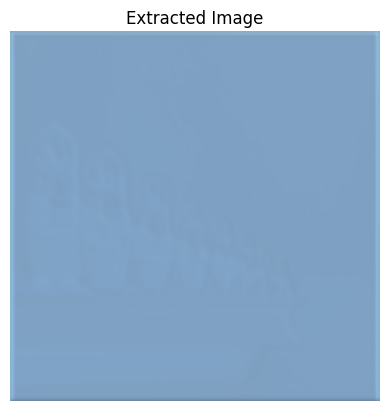

In [8]:
decoded_image = steg_model.predict(np.expand_dims(encoded_image, axis=0))[0]

# Save and display the extracted image
cv2.imwrite("/content/extracted_image.jpg", (decoded_image * 255).astype(np.uint8))
plt.imshow(decoded_image)
plt.title("Extracted Image")
plt.axis("off")
plt.show()
